# Punto2
## Algoritmo Simulated Annealing
### Nicolás Patalagua

Importamos librerias que se van a usar:

In [0]:
import random
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

Definimos el ingreso de la dimensión de la grilla:

In [0]:
n= random.randint(3, 20)

Representación de un individuo:

In [0]:
Tablero = []
for i in range(n):
    Tablero.append([0 for i in range(n)])


Definimos la función de costos:

In [0]:
def cost_function(individual):
    puntaje = 0
    sumatoriai = (len(individual) * (pow((len(individual)), 2) + 1)) / 2
    for fila in individual:
        sumatoria = 0
        for indice in fila:
            sumatoria += indice
        if sumatoria == sumatoriai:
            puntaje += 1
    for columna in range(len(individual)):
        sumatoria = 0
        for fila in range(len(individual[columna])):
            sumatoria += individual[fila][columna]
        if sumatoria == sumatoriai:
            puntaje += 1
    sumatoria = 0
    for diagonal in range(len(individual)):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    for diagonal in reversed(range(len(individual))):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    return mejorposible - puntaje

Definimos la función Annealing:

In [0]:
def annealing(estado_inicial, funcion_costo, siguiente_estado, acceptance_probability, temp_inicial,
              temp_decrease_factor, maxsteps):
    state = estado_inicial()
    cost = funcion_costo(state)
    states, costs = [state], [cost]
    num_accep = []
    T = temp_inicial
    while T > 0.01:
        aceptances = 0
        for step in range(maxsteps):
            new_state = siguiente_estado(state)
            new_cost = funcion_costo(new_state)
            if acceptance_probability(cost, new_cost, T) > rn.random():
                state, cost = new_state, new_cost
                states.append(state[:])
                costs.append(cost)
                aceptances += 1
        T *= temp_decrease_factor
        num_accep.append(aceptances)
    best_sol_index = costs.index(min(costs))
    return states[best_sol_index], costs[best_sol_index], states, costs, num_accep



Definimos el esatdo inicial:

In [0]:
def estado_inicial():
    numerofinal = pow((len(Tablero)), 2)
    numerosd = [i for i in range(1, numerofinal + 1)]
    for fila in Tablero:
        for indice in range(len(fila)):
            numero = rn.choice(numerosd)
            numerosd.pop(numerosd.index(numero))
            fila[indice] = numero
    return Tablero

Definimos la función para imprimir el tablero:

In [0]:
def imprimirtablero(tablero):
    for fila in tablero:
        for numero in fila:
            if numero < 10:
                print("0" + str(numero), end=" ")
            else:
                print(str(numero), end=" ")
        print("")

Definimos el siguiente estado:

In [0]:
def siguiente_estado(individual):
    if1 = random.randrange(len(individual))
    if2 = random.randrange(len(individual))
    ic1 = random.randrange(len(individual[if1]))
    ic2 = random.randrange(len(individual[if1]))
    individual[if1][ic1], individual[if2][ic2] = individual[if2][ic2], individual[if1][ic1]
    return individual

Definimos la función metropolis:

In [0]:
def algoritmo_metropolis(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

Definimos los parametros iniciales:

In [0]:
state, c, states, costs, num_accep = annealing(
    estado_inicial,
    cost_function,
    siguiente_estado,
    algoritmo_metropolis,
    temp_inicial=100,
    temp_decrease_factor=0.9,
    maxsteps=50
)

Calculos a realizarse:

In [0]:
mejorposible = int(n + n + 2)
mejorobtenido = int(c)
prcentaje = float(((100 * mejorobtenido) / mejorposible))

Imprimir datos obtenidos:

In [74]:
print("Porcentaje de error obtenido: " + str(prcentaje) + "%")
print("Costo mejor solucion: " + str(mejorobtenido))
print("Mejor costo posible: 0")
print("Sumatoria objetivo: " + str(int(n * (pow(n, 2) + 1) / 2)))

Porcentaje de error obtenido: 58.8235294117647%
Costo mejor solucion: 20
Mejor costo posible: 0
Sumatoria objetivo: 2056


Imprimimos el tablero:

In [75]:
imprimirtablero(state)

08 245 109 20 77 207 190 158 222 135 143 192 246 233 07 152 
134 60 144 65 93 186 250 89 66 123 154 69 247 86 29 55 
238 45 194 201 95 175 228 181 147 124 06 12 01 125 24 111 
145 234 224 216 52 193 28 40 197 131 214 18 15 218 255 107 
68 140 204 70 38 221 172 126 108 166 21 219 114 81 87 150 
256 05 26 101 243 54 56 160 232 155 62 237 112 174 83 195 
23 225 254 165 67 151 31 198 244 133 183 157 02 91 116 50 
73 156 94 48 128 11 205 208 33 117 78 251 75 34 187 223 
51 253 220 161 179 203 139 177 148 43 153 46 04 47 14 182 
90 188 118 16 44 178 248 119 113 217 74 211 252 202 176 209 
230 241 19 164 115 32 42 212 98 171 146 185 03 206 173 97 
141 58 25 71 137 79 72 130 85 36 103 27 189 162 127 30 
235 210 200 84 82 227 76 196 169 229 170 35 41 110 226 159 
104 63 149 213 88 13 59 100 215 167 249 236 102 61 180 168 
132 80 37 53 49 99 142 39 22 129 121 231 199 138 191 17 
96 239 122 09 10 57 184 163 64 106 120 240 105 242 136 92 


Gráfica:

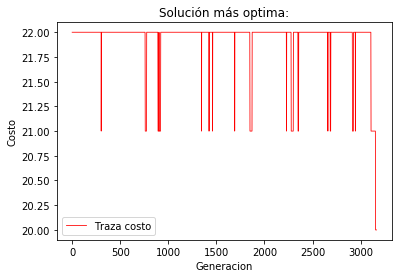

In [76]:
ejex = [i for i in range(len(costs))]
plt.plot(ejex, costs, '-', linewidth=0.8, color='r', label='Traza costo')
plt.title('Solución más optima:')
plt.xlabel('Generacion')
plt.ylabel('Costo')
plt.legend()